## 支持向量机

> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706101115.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706103846.png)
>
> 
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706103902.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706103916.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706103934.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706103944.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706103956.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104009.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104024.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104035.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104047.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104057.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104107.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104117.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104130.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104140.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104152.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104219.png)
>
> 
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104247.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104301.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104311.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104326.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706104340.png)
>
> xgboost
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706114532.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706114622.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706114637.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706114648.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706114700.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706114712.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706114736.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706114723.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706114736.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706114757.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706114812.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706114823.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706114835.png)
>
> ![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/20200706114847.png)

# 支持向量机（SVM）

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

### 支持向量基本原理



![](https://gitee.com/liangxinixn/demo13_drawing_bed/raw/master/blog01/3.png)
如何解决这个线性不可分问题呢？咱们给它映射到高维来试试

$z=x^2+y^2$. 




## 例子

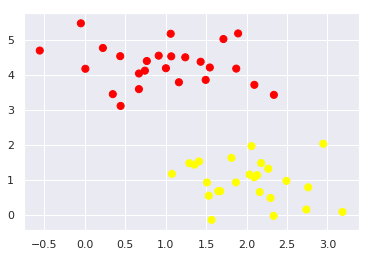

In [26]:
#随机来点数据
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

随便的画几条分割线，哪个好来这？

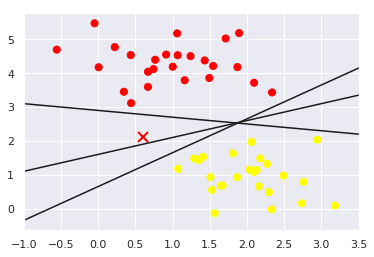

In [27]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

## Support Vector Machines: 最小化 *雷区*

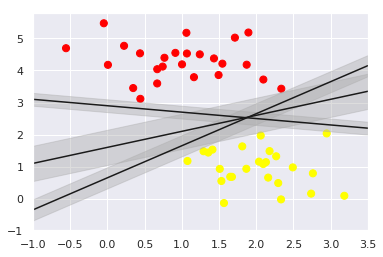

In [28]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

### 训练一个基本的SVM

In [29]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [30]:
#绘图函数
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

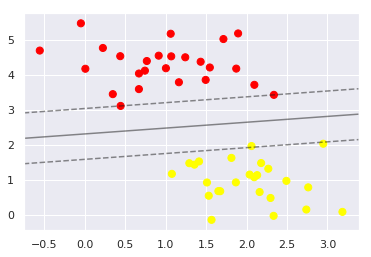

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

* 这条线就是我们希望得到的决策边界啦

* 观察发现有3个点做了特殊的标记，它们恰好都是边界上的点

* 它们就是我们的*support vectors*（支持向量）

* 在Scikit-Learn中, 它们存储在这个位置 ``support_vectors_``（一个属性）

In [32]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

* 观察可以发现，只需要支持向量我们就可以把模型构建出来

* 接下来我们尝试一下，用不同多的数据点，看看效果会不会发生变化

* 分别使用60个和120个数据点

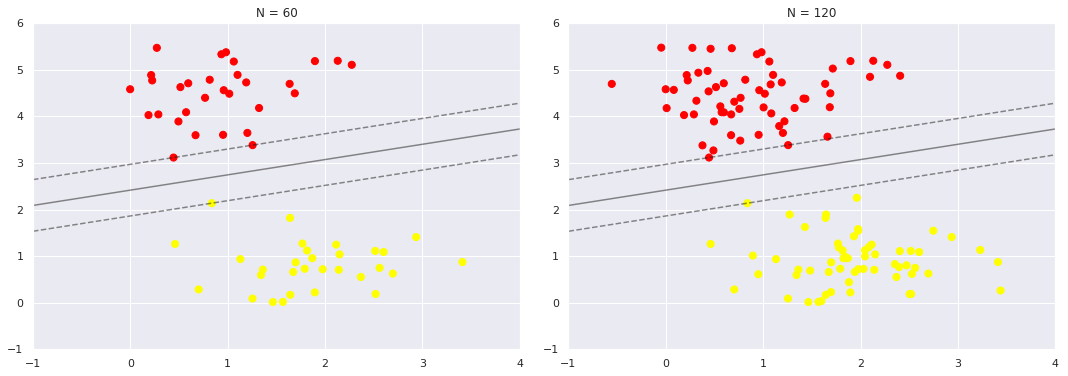

In [33]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

* 左边是60个点的结果，右边的是120个点的结果
* 观察发现，只要支持向量没变，其他的数据怎么加无所谓！

### 引入核函数的SVM
* 首先我们先用线性的核来看一下在下面这样比较难的数据集上还能分了吗？


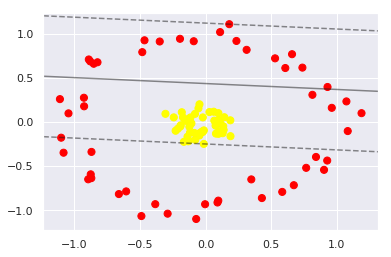

In [34]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

* 坏菜喽，分不了了，那咋办呢？试试高维核变换吧！
* We can visualize this extra data dimension using a three-dimensional plot:

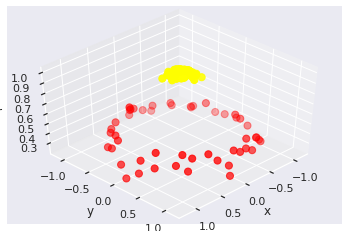

In [35]:
#加入了新的维度r
from mpl_toolkits import mplot3d
r = np.exp(-(X ** 2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

plot_3D(elev=45, azim=45, X=X, y=y)

In [36]:
#加入径向基函数
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

/usr/lib/python3/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

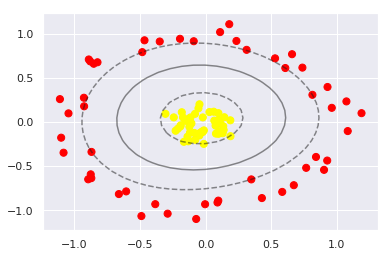

In [37]:
#这回牛逼了！
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

使用这种核支持向量机，我们学习一个合适的非线性决策边界。这种核变换策略在机器学习中经常被使用！

### 调节SVM参数: Soft Margin问题

### 调节C参数
* 当C趋近于无穷大时：意味着分类严格不能有错误
* 当C趋近于很小的时：意味着可以有更大的错误容忍

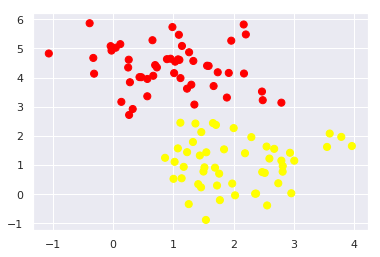

In [38]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

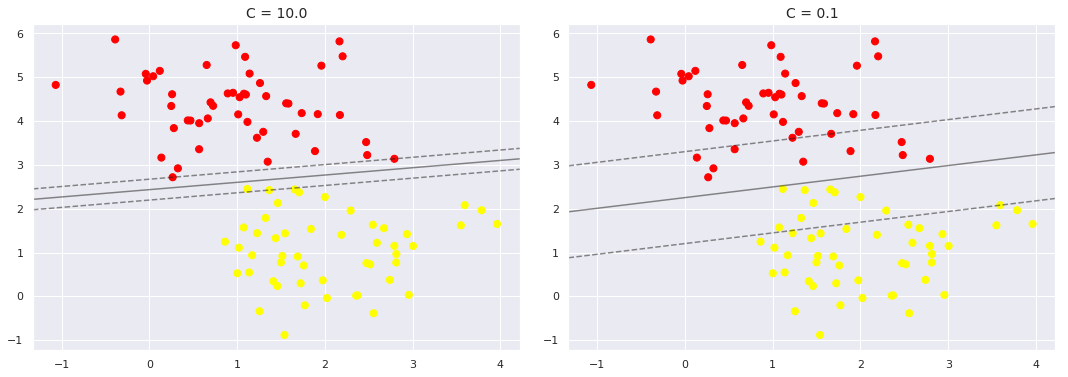

In [39]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

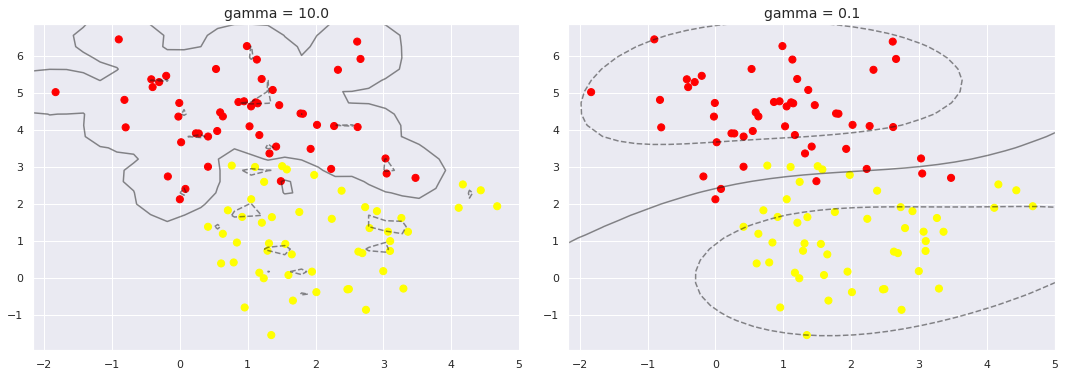

In [40]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.1)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, gamma in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='rbf', gamma=gamma).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('gamma = {0:.1f}'.format(gamma), size=14)

## Example: Face Recognition

As an example of support vector machines in action, let's take a look at the facial recognition problem.
We will use the Labeled Faces in the Wild dataset, which consists of several thousand collated photos of various public figures.
A fetcher for the dataset is built into Scikit-Learn:

In [41]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let's plot a few of these faces to see what we're working with:

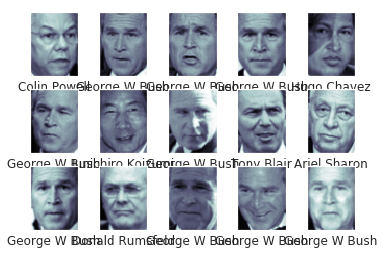

In [42]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

* 每个图的大小是 [62×47] 
* 在这里我们就把每一个像素点当成了一个特征，但是这样特征太多了，用PCA降维一下吧！

In [45]:
from sklearn.svm import SVC
#from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [46]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=40)

使用grid search cross-validation来选择我们的参数

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10],
              'svc__gamma': [0.0001, 0.0005, 0.001]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

/usr/lib/python3/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/lib/python3/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 1min 39s, sys: 5.02 s, total: 1min 44s
Wall time: 1min 44s
{'svc__C': 5, 'svc__gamma': 0.001}


In [48]:
model = grid.best_estimator_
yfit = model.predict(Xtest)
yfit.shape

(337,)

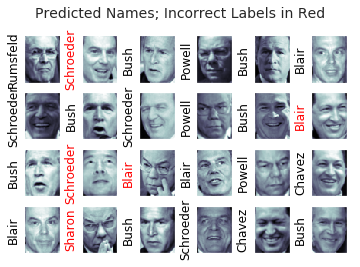

In [51]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [52]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.50      0.50      0.50        16
     Colin Powell       0.70      0.81      0.75        54
  Donald Rumsfeld       0.83      0.85      0.84        34
    George W Bush       0.94      0.88      0.91       136
Gerhard Schroeder       0.70      0.85      0.77        27
      Hugo Chavez       0.81      0.72      0.76        18
Junichiro Koizumi       0.87      0.87      0.87        15
       Tony Blair       0.85      0.76      0.80        37

        micro avg       0.82      0.82      0.82       337
        macro avg       0.77      0.78      0.77       337
     weighted avg       0.83      0.82      0.82       337



* 精度(precision) = 正确预测的个数(TP)/被预测正确的个数(TP+FP)
* 召回率(recall)=正确预测的个数(TP)/预测个数(TP+FN)
* F1 = 2*精度*召回率/(精度+召回率)

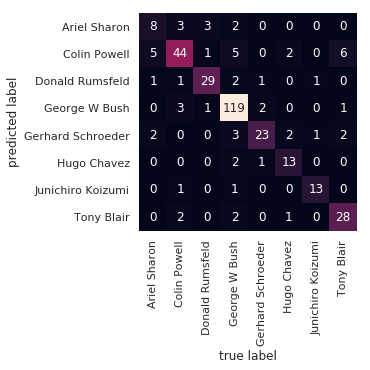

In [53]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

* 这样显示出来能帮助我们查看哪些人更容易弄混